# 1. Giriş

Önceki yazılarımızda özellikle iktisadi ve finansal zaman serilerinde sıklıkla görülen ortak değişen durağan doğrusal olasılıksal (covariance stationary linear stochastic processes) süreçlerle ilgilenmiştik. Buradaki modeller esasen hem zaman alanında hem de frekans alanındadır.

ARMA süreçleri belli sayıda parametreye sahiptir ve zaman serileri analizinin standart teorisi için bir köşetaşıdır. Her ARMA süreci, doğrusal durum uzayı (linear state space) biçiminde gösterilebilir. 

Frekans alanındaki analiz aynı zamanda **spektral analiz (spectral analysis)** olarak adlandırılır. Özünde, spektral analiz, eşdeğişen durağan bir sürecin özdeğişim fonksiyonunun alternatif bir temsilini sağlar. 

Fourier dönüşümü ve tersi, iki temsil arasında eşleme yapmak için kullanılır. Bu yazıda spektral analizle ilgili bazı temel kavramlara değindikten sonra zaman serilerinde bazı filtreler göz atacağız.

# 2. Spektral Analiz

## 2.1. Spektral Yoğunluklar

$\left\{X_{t}\right\}$, $\sum_{k} \gamma(k)^{2}<\infty$ koşulunu sağlayan özdeğişim fonksiyonu $\gamma$ ile ortak değişen durağan süreç olsun. $\left\{X_{t}\right\}$ nin **spektral yoğunluğu (spectral density)** olan $f$, özdeğişim fonksiyonu $\gamma$ nın, kesikli zaman Fourier dönüşümü (discrete time Fourier transform ) olarak tanımlanır:

$$
f(\omega):=\sum_{k \in \mathbb{Z}} \gamma(k) e^{-i \omega k}, \quad \omega \in \mathbb{R}
$$

$\gamma$ nın çift olduğundan hareketle, tüm $t$ ler için $\gamma(t)=\gamma(-t)$ için, 

$$
f(\omega)=\gamma(0)+2 \sum_{k \geq 1} \gamma(k) \cos (\omega k)
$$

olduğunu gösterebiliriz.

***Örnek: Beyaz Gürültü Süreci***

$\left\{\varepsilon_{t}\right\}$ biçiminde, $\sigma$ standart sapmaya sahip bir beyaz gürültü süreci düşünelim. Bu durumda, $f(\omega)=\sigma^{2}$ olacaktır. Dolayısıyla $f$ sabit bir fonksiyondur. Bu, “tüm frekansların eşit olarak mevcut olduğu” şeklinde yorumlanabilir. Beyaz ışığın, eğer frekans, beyaz gürültü teriminin kökenini sağlayan bir bağlantı olan görünür spektruma atıfta bulunduğunu düşünürsek, tam da bu özelliğe sahiptir diyebiliriz.

***Örnek: AR, MA ve ARMA***

$X_{t}=\theta \varepsilon_{t-1}+\varepsilon_{t}$ biçimindeki $\operatorname{MA}(1)$ süreci için spektral yoğunluk fonksiyonu:

$$
f(\omega)=\sigma^{2}\left(1+2 \theta \cos (\omega)+\theta^{2}\right)
$$

$X_{t}=\phi X_{t-1}+\varepsilon_{t}$ biçimindeki $\operatorname{AR}(1)$ süreci için spektral yoğunluk fonksiyonu:

$$
f(\omega)=\frac{\sigma^{2}}{1-2 \phi \cos (\omega)+\phi^{2}}
$$

Daha genel olarak ARMA süreci için spektral yoğunluk fonksiyonu:

$$
f(\omega)=\left|\frac{\theta\left(e^{i \omega}\right)}{\phi\left(e^{i \omega}\right)}\right|^{2} \sigma^{2}
$$

şeklinde gösterilebilir.

## 2.2. Spektral Yoğunluğun Yorumu

$\phi$, 0.8 ve -0.8 olduğunda $\operatorname{AR}(1)$ süreci için spektral yoğunluk fonksiyonunu çizelim:

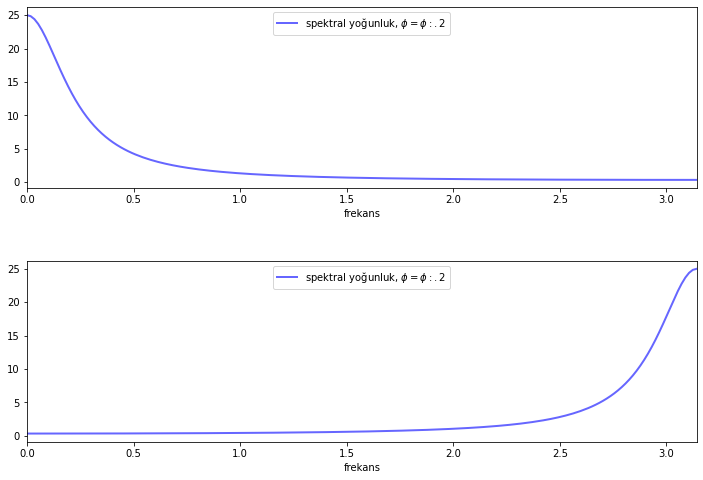

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

# AR(1) sürecinin spektral yoğunluk fonksiyonu
def ar1_sd(ϕ, ω):
    return 1 / (1 - 2 * ϕ * np.cos(ω) + ϕ**2)

ωs = np.linspace(0, np.pi, 180)
num_rows, num_cols = 2, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

# phi = 0.8 olduğunda özdeğişim
for i, ϕ in enumerate((0.8, -0.8)):
    ax = axes[i]
    sd = ar1_sd(ϕ, ωs)
    ax.plot(ωs, sd, 'b-', alpha=0.6, lw=2,
            label='spektral yoğunluk, $\phi = {ϕ:.2}$')
    ax.legend(loc='upper center')
    ax.set(xlabel='frekans', xlim=(0, np.pi))
plt.show()

Biçimsel olmayan bir şekilde, özdeğişim fonksiyonunun yaklaşık olarak büyük sönümlü döngüler sergiler gibi göründüğü $\omega \in[0, \pi]$ aralığında, spektral yoğunluğun da büyük olduğunu düşünebiliriz. Bunu görmek için, önceki grafiğin alt panelinde, $\phi=-0.8$ durumu için spektral yoğunluğun $\omega=\pi$ noktasında neden büyük olduğunu düşünelim. Spektral yoğunluk fonksiyonunun aşağıdaki gibi yazıldığını hatırlayalım:

$$
f(\omega)=\gamma(0)+2 \sum_{k \geq 1} \gamma(k) \cos (\omega k)=\gamma(0)+2 \sum_{k \geq 1}(-0.8)^{k} \cos (\omega k)
$$

Bunu $\omega=\pi$ noktasında ele alırsak, $(-0.8)^{k}$ pozitif iken $\cos (\pi k)$ büyük ve pozitif olduğundan, büyük bir sayı görürüz; $(-0.8)^{k}$ negatif iken, mutlak değer olarak büyük ve negatif bir sayı görürüz.

Dolayısıyla çarpım her zaman büyük ve pozitiftir ve bu nedenle yukarıdaki denklemin sağ tarafındaki çarpımların toplamı büyüktür. Bunları, yatay eksende $k$ olacak şekilde çizelim:

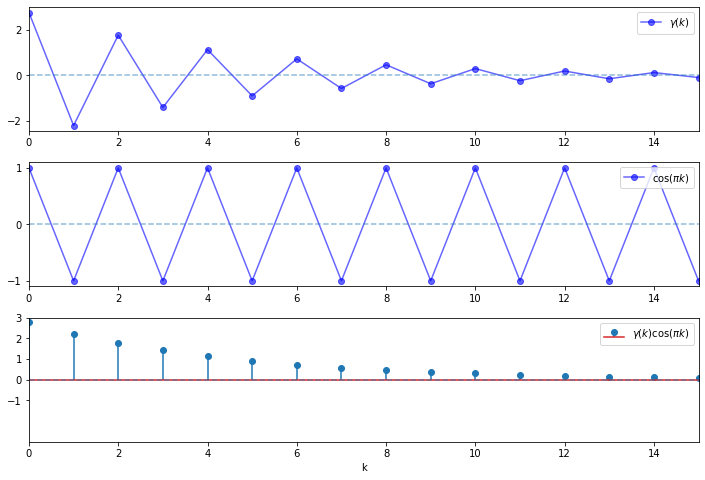

In [3]:
ϕ = -0.8
times = list(range(16))
y1 = [ϕ**k / (1 - ϕ**2) for k in times]
y2 = [np.cos(np.pi * k) for k in times]
y3 = [a * b for a, b in zip(y1, y2)]

num_rows, num_cols = 3, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
plt.subplots_adjust(hspace=0.25)

# ϕ = -0.8 iken özdeğişim
ax = axes[0]
ax.plot(times, y1, 'bo-', alpha=0.6, label='$\gamma(k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-2, 0, 2))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# π frekansında döngüler
ax = axes[1]
ax.plot(times, y2, 'bo-', alpha=0.6, label='$\cos(\pi k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-1, 0, 1))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# çarpım
ax = axes[2]
ax.stem(times, y3, label='$\gamma(k) \cos(\pi k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), ylim=(-3, 3), yticks=(-1, 0, 1, 2, 3))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
ax.set_xlabel("k")

plt.show()

Öte yandan, $f(\omega)$ fonksiyonunu $\omega=\pi / 3$ noktasında ele alırsak, döngüler eşleşmez, $\gamma(k) \cos (\omega k)$ dizisi hem pozitif hem de negatif terimler içerir ve bu nedenle bu terimlerin toplamı çok daha küçüktür.

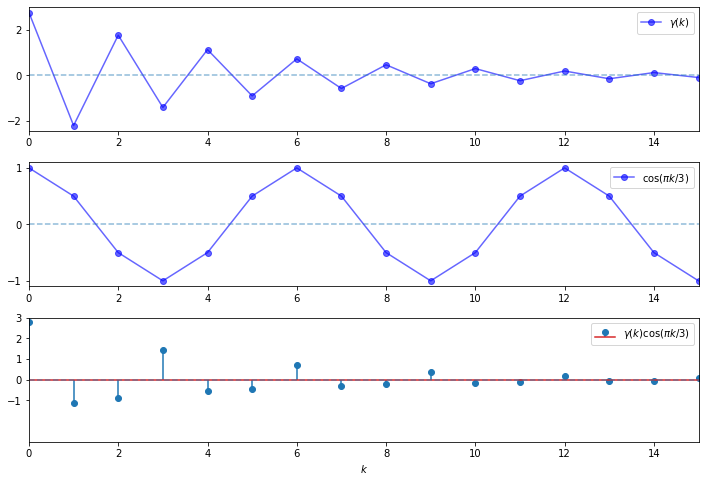

In [4]:
ϕ = -0.8
times = list(range(16))
y1 = [ϕ**k / (1 - ϕ**2) for k in times]
y2 = [np.cos(np.pi * k/3) for k in times]
y3 = [a * b for a, b in zip(y1, y2)]

num_rows, num_cols = 3, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
plt.subplots_adjust(hspace=0.25)

# phi = -0.8 iken özdeğişim
ax = axes[0]
ax.plot(times, y1, 'bo-', alpha=0.6, label='$\gamma(k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-2, 0, 2))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# π frekansında döngüler
ax = axes[1]
ax.plot(times, y2, 'bo-', alpha=0.6, label='$\cos(\pi k/3)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-1, 0, 1))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# çarpım
ax = axes[2]
ax.stem(times, y3, label='$\gamma(k) \cos(\pi k/3)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), ylim=(-3, 3), yticks=(-1, 0, 1, 2, 3))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
ax.set_xlabel("$k$")

plt.show()

Özetle, spektral yoğunluk, özdeğişim fonksiyonunun sönümlü döngüler sergilediği $\omega$ frekanslarında büyüktür.

## 2.3. Dönüşümü Tersine Çevirme

Spektral yoğunluğun, ortak değişen durağan bir sürecin özdeğişim yapısı üzerinde frekansa dayalı bir bakış açısı sağlaması açısından faydalı olduğunu gördük. Spektral yoğunluğun yararlı olmasının bir başka nedeni de, **ters Fourier dönüşümü (inverse Fourier Transformation)** yoluyla özdeğişim fonksiyonunu kurtarmak için *ters çevrilebilir* olmasıdır.

Tüm $k \in \mathbb{Z}$ için,

$$
\gamma(k)=\frac{1}{2 \pi} \int_{-\pi}^{\pi} f(\omega) e^{i \omega k} d \omega
$$

Bu, spektral yoğunluğun hesaplanması ve işlenmesinin özdeğişim fonksiyonundan daha kolay olduğu durumlarda uygun bir yöntemdir.

## 2.4. Periodogram

Burada, verilerden spektral yoğunlukları ve diğer ilgili miktarları tahmin etme sorununu ele alacağız. Spektral yoğunluk tahminleri, **periodogram** olarak bilinen araç kullanılarak hesaplanır - bu da ünlü **hızlı Fourier dönüşümü (fast Fourier transformation)** ile hesaplanır. Temel teknik açıklandıktan sonra, bunu birkaç temel makroekonomik zaman serisinin analizine uygulayacağız. Burada kullanacağımız özel bir çerçeve `quantecon` çerçevesi olacak. Diğer çerçeveler gibi, bu çerçeveyi de kurmak oldukça kolay:

```python
pip install quantecon
```

In [5]:
import quantecon as qe

Bir özdeğişimin spektral yoğunluğu $f$ durağan süreç $\gamma$ özilinti fonksiyonu ile yazılabilir:

$$
f(\omega)=\gamma(0)+2 \sum_{k \geq 1} \gamma(k) \cos (\omega k), \quad \omega \in \mathbb{R}
$$

Şimdi, $\gamma$ bilinmediğinde belirli bir zaman serisinin spektral yoğunluğunu tahmin etme problemini ele alalım. $X_{0}, \ldots, X_{n-1}$, ortak değişen durağan olduğu varsayılan tek bir zaman serisinin $n$ adet ardışık gözlemi olsun. Bu işlemin spektral yoğunluğunun en yaygın tahmincisi, $X_{0}, \ldots, X_{n-1}$ dizisini *periodogramıdır* ve şu şekilde tanımlanır:

$$
I(\omega):=\frac{1}{n}\left|\sum_{t=0}^{n-1} X_{t} e^{i t \omega}\right|^{2}, \quad \omega \in \mathbb{R}
$$

Alternatif olarak, $I(\omega)$ aşağıdaki gibi de tanımlanabilir:

$$
I(\omega)=\frac{1}{n}\left\{\left[\sum_{t=0}^{n-1} X_{t} \cos (\omega t)\right]^{2}+\left[\sum_{t=0}^{n-1} X_{t} \sin (\omega t)\right]^{2}\right\}
$$

### 2.4.1. Peridogramın Yorumu

Periodogramı yorumlamak için *Fourier frekanslarındaki* değerlerine odaklanmak gerekir:

$$
\omega_{j}:=\frac{2 \pi j}{n}, \quad j=0, \ldots, n-1
$$

Hangi durumda, $I\left(\omega_{j}\right)$, $f\left(\omega_{j}\right)$'nin bir tahmincisidir? Bunun için birkaç cebirsel işlemden sonra aşağıdaki eşitliği elde ederiz:

$$
n I\left(\omega_{j}\right)=\sum_{t=0}^{n-1}\left(X_{t}-\bar{X}\right)^{2}+2 \sum_{k=1}^{n-1} \sum_{t=k}^{n-1}\left(X_{t}-\bar{X}\right)\left(X_{t-k}-\bar{X}\right) \cos \left(\omega_{j} k\right)
$$

Şimdi şunu düşünelim:

$$
\hat{\gamma}(k):=\frac{1}{n} \sum_{t=k}^{n-1}\left(X_{t}-\bar{X}\right)\left(X_{t-k}-\bar{X}\right), \quad k=0,1, \ldots, n-1
$$

Bu, özdeğişim fonksiyonu $\gamma$'nın doğal *eklenebilir tahmincisi (plug-in estimator)* olan örneklem özdeğişim fonksiyonudur. Bu notasyonla aşağıdaki eşitliği yazabiliriz:

$$
I\left(\omega_{j}\right)=\hat{\gamma}(0)+2 \sum_{k=1}^{n-1} \hat{\gamma}(k) \cos \left(\omega_{j} k\right)
$$

Dolayısıyla, $I\left(\omega_{j}\right)$, $f\left(\omega_{j}\right)$'nin örneklem analogudur.  

### 2.4.2. Periodogramın Hesaplanması

Periyodogramı hesaplamanın en yaygın yolu, hızlı Fourier dönüşümü algoritması aracılığıyla uygulanan ayrık Fourier dönüşümüdür. Genel olarak, $a_{0}, \ldots, a_{n-1}$ olarak verilmiş bir dizide, ayrık Fourier dönüşümü aşağıdaki diziyi hesaplar:

$$
A_{j}:=\sum_{t=0}^{n-1} a_{t} \exp \left\{i 2 \pi \frac{t j}{n}\right\}, \quad j=0, \ldots, n-1
$$

`numpy` çerçevesinden çağırdığımız `fft` metodu ve $a_{0}, \ldots, a_{n-1}$ dizisini içeren `a`, `Numpy` dizesi ile `fft(a)` fonksiyonu çağırıldığında $A_{0}, \ldots, A_{n-1}$ dizisini içeren `Numpy` dizesi döner.

`x` dizesi içinde kayıtlı $X_{0}, \ldots, X_{n-1}$ dizisi için, Fourier frekanslarındaki $I\left(\omega_{j}\right)$ değerleri:

$$
\frac{1}{n}\left|\sum_{t=0}^{n-1} X_{t} \exp \left\{i 2 \pi \frac{t j}{n}\right\}\right|^{2}, \quad j=0, \ldots, n-1
$$

`np.abs(fft(X))**2 / len(X)` ile hesaplanır. 

Fakat tüm bunları `periodogram` metodu tek başına yapabilir.

Aşağıdaki sürece göre türetilmiş dizi için periyodogram ve spektral yoğunluğu hesaplayalım:

$$
X_{t}=0.5 X_{t-1}+\varepsilon_{t}-0.8 \varepsilon_{t-2}
$$

burada $\left\{\varepsilon_{t}\right\}$, birim değişintiye sahip beyaz gürültü sürecidir.

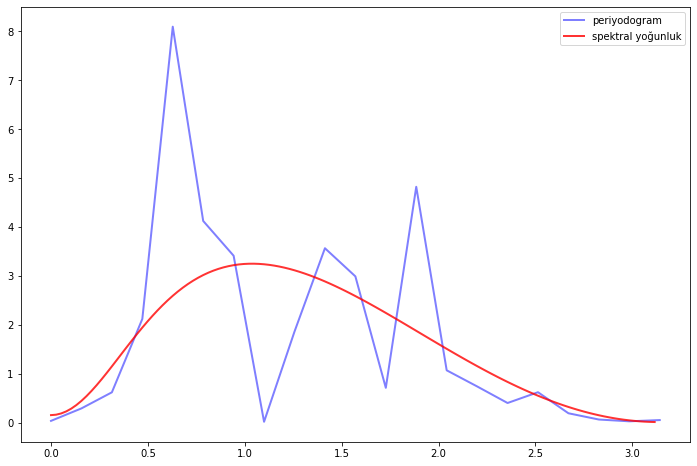

In [7]:
# örneklem boyutu
n = 40                          
# AR ve MA parametreleri 
ϕ, θ = 0.5, (0, -0.8)           
lp = qe.ARMA(ϕ, θ)
X = lp.simulation(ts_length=n)

fig, ax = plt.subplots(figsize=(12, 8))
x, y    = qe.periodogram(X)
ax.plot(x, y, 'b-', lw=2, alpha=0.5, label='periyodogram')
x_sd, y_sd = lp.spectral_density(two_pi=False, res=120)
ax.plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spektral yoğunluk')
ax.legend()
plt.show()

Tahminler biraz kötü görünüyor. Bu örneklem boyutundan kaynaklı olabilir. `n=1200` örneklem ile tekrar çalıştıralım:

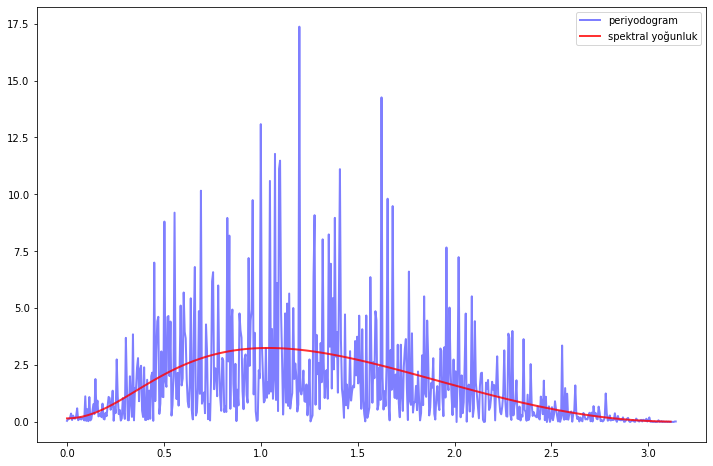

In [8]:
# örneklem boyutu
n = 1200                          
# AR ve MA parametreleri 
ϕ, θ = 0.5, (0, -0.8)           
lp = qe.ARMA(ϕ, θ)
X = lp.simulation(ts_length=n)

fig, ax = plt.subplots(figsize=(12, 8))
x, y    = qe.periodogram(X)
ax.plot(x, y, 'b-', lw=2, alpha=0.5, label='periyodogram')
x_sd, y_sd = lp.spectral_density(two_pi=False, res=120)
ax.plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spektral yoğunluk')
ax.legend()
plt.show()

Periyodogram, altta yatan spektral yoğunluğa göre çok düzensizdir. Bu da bizi, bir başka soruna götürür: *düzgünleştirme*.

## 2.5. Düzgünleştirme (Smoothing)

Burada birbiriyle bağlantılı iki problem var. Birincisi, hızlı Fourier dönüşümünün uygulanma şekli göz önüne alındığında, $I(\omega)$ nin tahmin edildiği $\omega$ gözlem noktalarının sayısı, veri miktarına paralel olarak artar. Başka bir deyişle, daha fazla veriye sahip olmamıza rağmen, onu daha fazla değer tahmin etmek için de kullanırız. İkinci bir problem, parametrik varsayımlar olmadan her türden yoğunluğun tahmin edilmesinin temelde zor olmasıdır. Tipik olarak, yoğunlukların parametrik olmayan tahmini, bir dereceye kadar düzgünleştirme gerektirir. Düzgünleştirmenin periodogramlara uygulanmasının standart yolu, yerel ortalamaların alınmasıdır. Başka bir deyişle $I\left(\omega_{j}\right)$ yerine önceki değerlerin ağırlıklı ortalaması kullanılır:

$$
I\left(\omega_{j-p}\right), I\left(\omega_{j-p+1}\right), \ldots, I\left(\omega_{j}\right), \ldots, I\left(\omega_{j+p}\right)
$$

Bu ağırlıklı ortalama şu şekilde yazılabilir:

$$
I_{S}\left(\omega_{j}\right):=\sum_{\ell=-p}^{p} w(\ell) I\left(\omega_{j+\ell}\right)
$$

Genel olarak, daha büyük $p$ değerleri daha fazla düzgünleştirmeyi gösterir.

# 3. Zaman Serisi Filtreleri

**Filtreler** zaman serisinin taşıdığı trend, konjonktür, mevsimsellik ve düzensiz unsurları genellikle sabit bir hareketli ortalamalar filtresi uygulayarak ayrıştıran yöntemlerdir. Bu yöntemlerde tipik olarak serilerin ortasına denk gelen değerlere simetrik doğrusal filtreler uygulanırken, başına ve sonuna denk gelen değerlere asimetrik doğrusal filtreler uygulanmaktadır. Yöntemlerin amacı orijinal veriyi dairesel döngülerden arındırmaktır. Böylece düzgünleştirilmiş (smoothing) bir trend tahmini yapmak mümkün olacaktır.

Filtre bazlı yöntemlerde unsurların açık bir model yardımıyla modellenmesi gerekmemektedir. Düzensiz unsurlar mevsimsel sıklığa bağlı olarak düzleştirilmiş bir trend tahmini sonrasında bulunur. Bu yöntemlerde düzeltme sürecinin özellikleri kullanılan filtrenin özellikleri ile doğrudan bağlantılıdır.

Burada, filtrelerin nasıl çalıştığını gösterebilmek için, Türkiye için, 2000-01-01:2021-09-01 dönemine ait aylık işsizlik oranı ve TÜFE ile çeyreklik Reel GSYH verileri üzerinde çalışacağız. Verileri `pandas_datareader` çerçevesi ile `FRED` den çalışma ortamına alacağız: 

In [22]:
import pandas_datareader as pdr
import datetime

# başlangıç ve bitiş tarihleri
başlangıç = datetime.datetime(2000, 1, 1)
bitiş    = datetime.datetime(2021, 9, 1)

# makro iktisadi değişkenler
işsizlik_oranı = pdr.DataReader('LRHUTTTTTRM156S', 'fred', start=başlangıç, end=bitiş).rename(columns = {"LRHUTTTTTRM156S":'işsizlik_oranı'})
tüfe           = pdr.DataReader('CPALTT01TRM659N', 'fred', start=başlangıç, end=bitiş).rename(columns = {"CPALTT01TRM659N":'tüfe'})
reel_gsyh      = pdr.DataReader('NGDPRSAXDCTRQ', 'fred', start=başlangıç, end=bitiş).rename(columns = {"NGDPRSAXDCTRQ":'reel_gsyh'})

# reel gsyh için logaritmik dönüşüm
reel_gsyh['log_gsyh'] = np.log(reel_gsyh['reel_gsyh'])

Verilerin grafiklerini çizip bakalım:

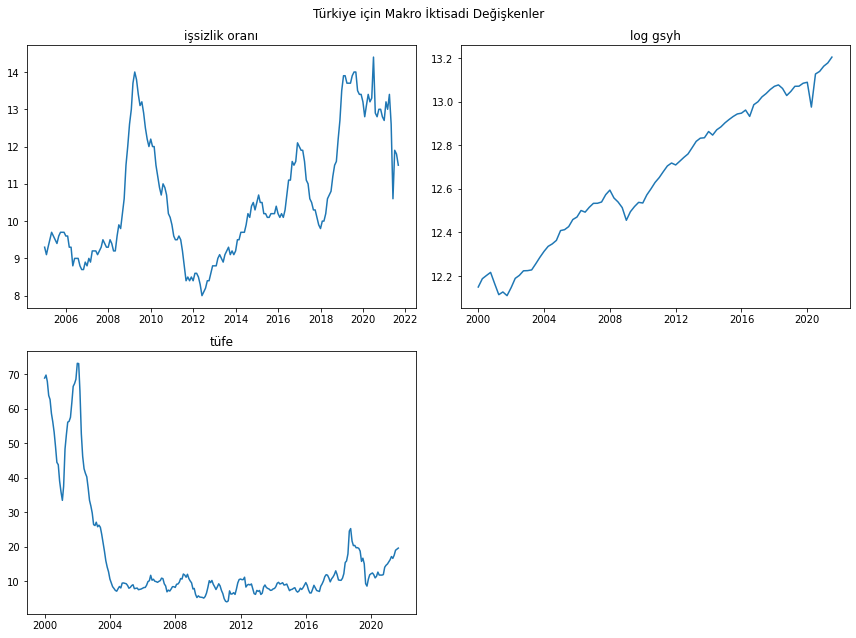

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle('Türkiye için Makro İktisadi Değişkenler')

axs[0, 0].plot(işsizlik_oranı['işsizlik_oranı'])
axs[0, 0].set_title("işsizlik oranı")

axs[1, 0].plot(tüfe['tüfe'])
axs[1, 0].set_title("tüfe")

axs[0, 1].plot(reel_gsyh['log_gsyh'])
axs[0, 1].set_title("log gsyh")

fig.delaxes(axs[1,1])

fig.tight_layout()

# 3.1. Hodrick-Prescott Filtresi

Hodrick-Prescott filtresi, $y_{t}$ zaman serisini trend $\tau_{t}$ ve döngüsel bileşen $\zeta_{t}$ olarak ayrıştırır:

$$
y_{t}=\tau_{t}+\zeta_{t}
$$

Bileşenler, aşağıdaki ikinci dereceden kayıp fonksiyonunu en küçükleyerek (minimization) belirlenir:

$$
\min _{\tau_{t}} \sum_{t}^{T} \zeta_{t}^{2}+\lambda \sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}
$$

Logaritmik GSYH için HP filtresini uygulayalım:

In [25]:
import statsmodels.api as sm

# döngüsel ve trend bileşenleri
gsyh_döngüsel_bileşen, gsyh_trend_bileşeni = sm.tsa.filters.hpfilter(reel_gsyh.log_gsyh)

# bileşenlerden ayrı bir veri çerçevesi oluşturulması
ayrıştırılmış_gsyh = reel_gsyh[["log_gsyh"]].copy()
ayrıştırılmış_gsyh["döngü"] = gsyh_döngüsel_bileşen
ayrıştırılmış_gsyh["trend"] = gsyh_trend_bileşeni

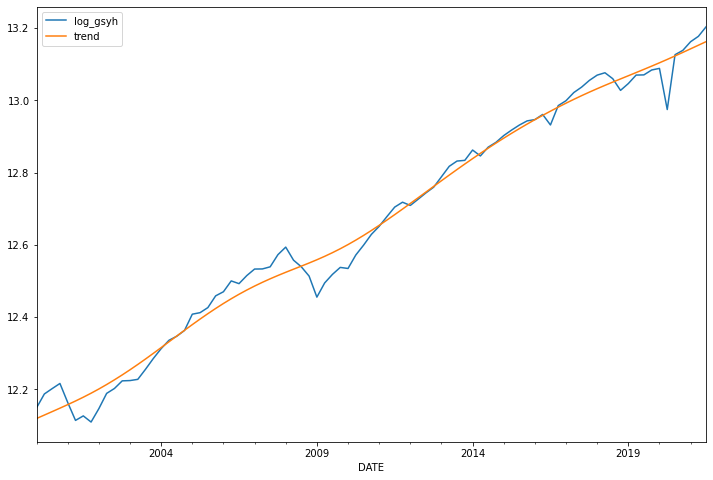

In [29]:
ayrıştırılmış_gsyh[['log_gsyh', 'trend']].plot(figsize=(12,8));

## 3.2. Baxter-King Yaklaşık Bant-Geçiren Filtre (Band-Pass Filter)

**Baxter-King filtresinin**, iş döngüsünün periyodikliği ile açıkça ilgilenmesi amaçlanmıştır. Bant geçiren filtrelerini bir seriye uygulayarak, konjonktürdekinden daha yüksek veya daha düşük dalgalanmalar içermeyen yeni bir seri üretirler. Spesifik olarak, BK filtresi simetrik hareketli ortalama şeklini alır:

$$
y_{t}^{*}=\sum_{k=-K}^{k=K} a_{k} y_{t-k}
$$

burada, $a_{-k}=a_{k}$ ve $\sum_{k=-k}^{K} a_{k}=0$, serideki herhangi bir trendi ortadan kaldırmak ve serinin $I(1)$ veya $I(2)$ olması durumunda onu durağan hale getirmek içindir. Burada filtre ağırlıkları aşağıdaki gibi belirlenir:

$$
\begin{gathered}
a_{j}=B_{j}+\theta \text { for } j=0, \pm 1, \pm 2, \ldots, \pm K \\
B_{0}=\frac{\left(\omega_{2}-\omega_{1}\right)}{\pi} \\
B_{j}=\frac{1}{\pi i}\left(\sin \left(\omega_{2} j\right)-\sin \left(\omega_{1} j\right)\right) \text { for } j=0, \pm 1, \pm 2, \ldots, \pm K
\end{gathered}
$$

burada burada $\theta$, ağırlıkların toplamı sıfıra eşit olacak şekilde bir normalleştirme sabitidir:

$$
\begin{gathered}
\theta=\frac{-\sum_{j=-K^{K} b_{j}}}{2 K+1} \\
\omega_{1}=\frac{2 \pi}{P_{H}} \\
\omega_{2}=\frac{2 \pi}{P_{L}}
\end{gathered}
$$

burada $P_{L}$ ve $P_{H}$, düşük ve yüksek kesme frekanslarının periyodikliğidir.

BK filtresini ile işsizlik ve tüfe verilerine uygulayalım: 

In [30]:
bk_döngüleri_tüfe     = sm.tsa.filters.bkfilter(tüfe['tüfe'])
bk_döngüleri_işsizlik = sm.tsa.filters.bkfilter(işsizlik_oranı['işsizlik_oranı'])

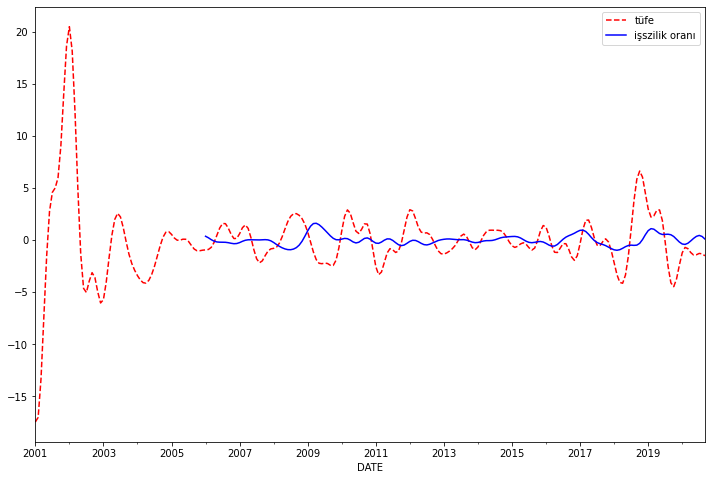

In [42]:
fig = plt.figure(figsize=(12, 8));
ax = fig.add_subplot(111);
bk_döngüleri_tüfe.plot(ax=ax, label="tüfe", style=["r--"]);
bk_döngüleri_işsizlik.plot(ax=ax, label="işszilik oranı", style=["b-"]);
ax.legend(loc=1);

Genel olarak, işsizlik düştüğünde, TÜFE'nin arttığını gözlemliyoruz.

## 3.3. Christiano-Fitzgerald Bant-Geçiren Filtre

Christiano-Fitzgerald filtresi, BK'nin bir genellemesidir ve bu nedenle ağırlıklı hareketli ortalama olarak da görülebilir. Bununla birlikte, CF filtresi tüm seriyi kullanmanın yanı sıra $t$ için asimetriktir. Filtrenin uygulanması, aşağıdaki ağırlıkların hesaplanmasını içerir:

$$
y_{t}^{*}=B_{0} y_{t}+B_{1} y_{t+1}+\cdots+B_{T-1-t} y_{T-1}+\tilde{B}_{T-t} y_{T}+B_{1} y_{t-1}+\cdots+B_{t-2} y_{2}+\tilde{B}_{t-1} y_{1}
$$

$t=3,4, \ldots, T-2$ için, burada,

$$
\begin{aligned}
B_{j} &=\frac{\sin (j b)-\sin (j a)}{\pi j}, j \geq 1 \\
B_{0} &=\frac{b-a}{\pi}, a=\frac{2 \pi}{P_{u}}, b=\frac{2 \pi}{P_{L}}
\end{aligned}
$$

burada $\tilde{B}_{T-t}$ ve $\tilde{B}_{t-1}$, $B_{j}$'nin lineer fonksiyonlarıdır ve $t=1,2, T-1$, ve $T$ için değerler, yukarıda $P_{U}$ ve $P_{L}$ için hesaplandığı gibi hesaplanır.

İşsizlik ve TÜFE verilerine CF filtresini uygulayalım:

In [43]:
cf_döngüleri_tüfe, cf_trend_tüfe     = sm.tsa.filters.cffilter(tüfe['tüfe'])
cf_döngüleri_işsizlik, cf_trend_tüfe = sm.tsa.filters.cffilter(işsizlik_oranı['işsizlik_oranı'])

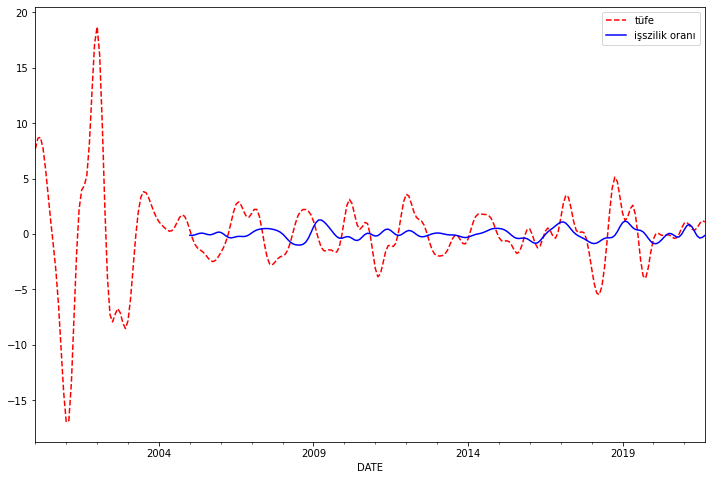

In [44]:
fig = plt.figure(figsize=(12, 8));
ax = fig.add_subplot(111);
cf_döngüleri_tüfe.plot(ax=ax, label="tüfe", style=["r--"]);
cf_döngüleri_işsizlik.plot(ax=ax, label="işszilik oranı", style=["b-"]);
ax.legend(loc=1);